In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import random

In [2]:
data = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/VitusData/DataSet.csv')

In [3]:
data.head()

,ImageDir,Label,MaskDir
0,/Users/madsandersen/PycharmProjects/BscProjekt...,Negative,NaN
1,/Users/madsandersen/PycharmProjects/BscProjekt...,Negative,NaN
2,/Users/madsandersen/PycharmProjects/BscProjekt...,Negative,NaN
3,/Users/madsandersen/PycharmProjects/BscProjekt...,Negative,NaN
4,/Users/madsandersen/PycharmProjects/BscProjekt...,Negative,NaN


In [4]:
data.groupby('Label').count()

,ImageDir,MaskDir
Label,,
Crack A,335,335
Crack B,470,470
Crack C,247,247
Finger Failure,1000,1000
Negative,35114,0


/var/folders/_r/jlncy8s12v3dnkjbml325cq00000gn/T/ipykernel_50914/4153062753.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='Label',


Text(0.5, 1.0, 'Label distribution')

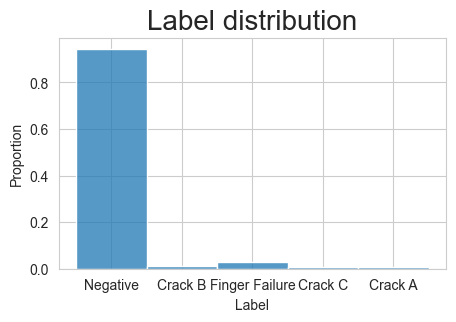

In [7]:
#Plot distribution of labels and set header to "Label distribution"
fig = plt.figure(figsize=(5, 3))
sns.countplot(x='Label',
              data=data,
              palette='hls')
plt.title('Label distribution', fontsize=20)


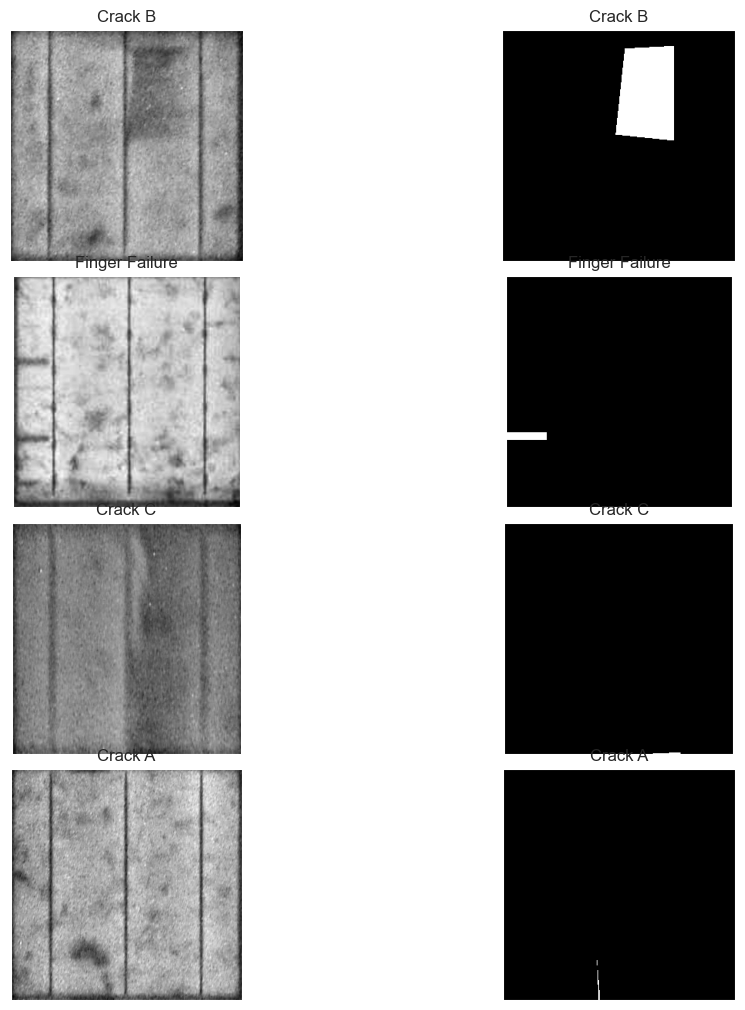

In [30]:
# Ceate a plot where each row is a label and first column is the image and the second column is the mask of the image
fig, ax = plt.subplots(4, 2, figsize=(10, 10))
#remove the grid
for i in range(4):
    for j in range(2):
        ax[i, j].grid(False)
#remove the x and y ticks
for i in range(4):
    for j in range(2):
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])

plt.tight_layout()

for i, label in enumerate(data['Label'].unique()):
    if label == 'Negative':
        continue

    #Get random image form each label
    ridx = random.randint(0, len(data[data['Label'] == label]))
    random_dir = data[data['Label'] == label].iloc[ridx]['ImageDir']
    mask_dir = data[data['Label'] == label].iloc[ridx]['MaskDir']

    #Load the images
    image = np.array(Image.open(random_dir))
    mask = np.array(Image.open(mask_dir))*255

    ax[i-1, 0].imshow(image, cmap='gray')
    ax[i-1, 0].set_title(label)
    ax[i-1, 1].imshow(mask,cmap='gray')
    ax[i-1, 1].set_title(label)

In [27]:
data[data['Label'] == label].iloc[0]['ImageDir']

'/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/VitusData/Serier/Series1/CellsCorr/Serie_1_ImageCorr_-16_4133_Cell_Row2_Col_3.png'